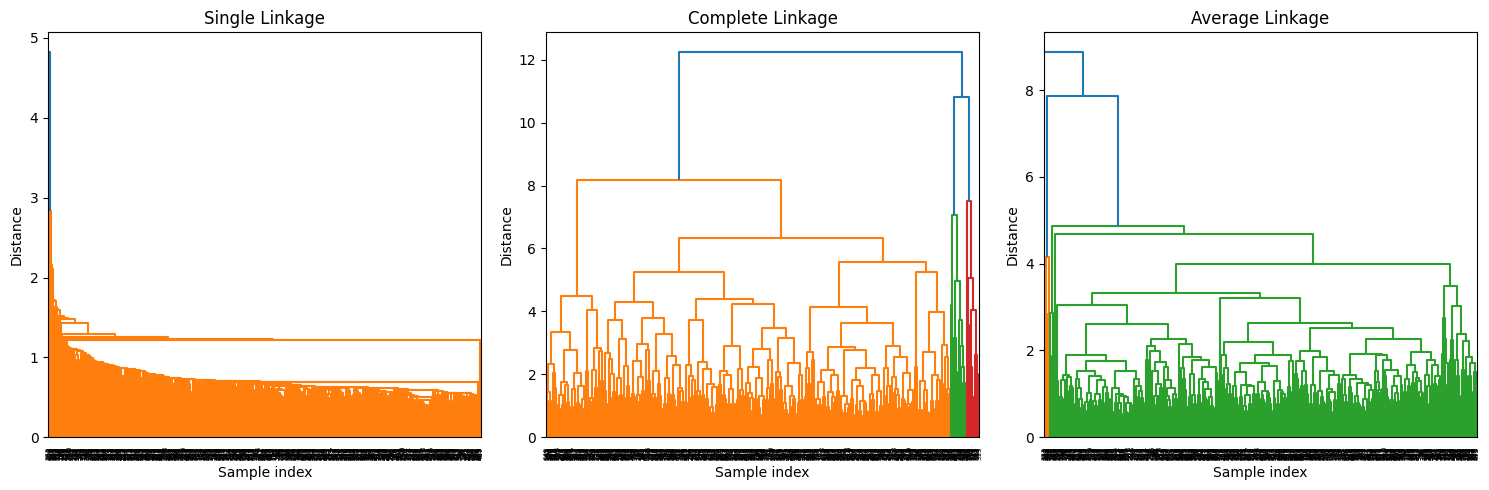

In [2]:
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
data = pd.read_csv('./data/imdb_dataset.csv')

# Selecting relevant numerical features for clustering
features = data[["runtime", "thtr_rel_year", "imdb_rating", "imdb_num_votes", "critics_score", "audience_score"]]

# Check for missing or infinite values and handle them
features = features.replace([np.inf, -np.inf], np.nan)  # Replace infinite values with NaN
features = features.dropna()  # Drop rows with NaN values

# Normalizing the data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Ensure the scaled data does not contain non-finite values
if not np.all(np.isfinite(features_scaled)):
    raise ValueError("Non-finite values found in scaled features")

# Hierarchical clustering with different linkages
linkage_methods = ['single', 'complete', 'average']
clusterings = {method: linkage(features_scaled, method=method) for method in linkage_methods}

# Plotting dendrograms for each linkage method
plt.figure(figsize=(15, 5))
for i, (method, clustering) in enumerate(clusterings.items(), 1):
    plt.subplot(1, 3, i)
    dendrogram(clustering)
    plt.title(f'{method.capitalize()} Linkage')
    plt.xlabel('Sample index')
    plt.ylabel('Distance')
plt.tight_layout()
plt.show()

